# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
 
#Partial query url
query_url = f'{url}appid={weather_api_key}&units={units}&q='

#set up lists to hold response info

city_name = []
lat = []
long = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
   
city_count = 0
sets = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    if city_count <= 49:
        city_count = city_count + 1
    else:
        city_count = 1
        sets = sets + 1
        
    #print(f"city count {city_count} and sets {sets}")
    
        
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing record: {city_count} of set: {sets} | {city}")
    except KeyError:
        print("No weather data found")
    
#Print out city name with index



Processing record: 1 of set: 1 | flinders
Processing record: 2 of set: 1 | barrow
Processing record: 3 of set: 1 | ushuaia
Processing record: 4 of set: 1 | chumikan
Processing record: 5 of set: 1 | yellowknife
Processing record: 6 of set: 1 | victoria
Processing record: 7 of set: 1 | puerto ayora
Processing record: 8 of set: 1 | port alfred
Processing record: 9 of set: 1 | jamestown
No weather data found
Processing record: 11 of set: 1 | masterton
Processing record: 12 of set: 1 | cape town
Processing record: 13 of set: 1 | mao
Processing record: 14 of set: 1 | douala
Processing record: 15 of set: 1 | college
Processing record: 16 of set: 1 | krasnyy oktyabr
Processing record: 17 of set: 1 | storm lake
Processing record: 18 of set: 1 | summerville
Processing record: 19 of set: 1 | hithadhoo
Processing record: 20 of set: 1 | punta arenas
Processing record: 21 of set: 1 | cabo san lucas
Processing record: 22 of set: 1 | tuktoyaktuk
Processing record: 23 of set: 1 | provideniya
Processing

Processing record: 50 of set: 4 | nurota
Processing record: 1 of set: 5 | phan thiet
Processing record: 2 of set: 5 | qinnan
No weather data found
Processing record: 4 of set: 5 | sale
Processing record: 5 of set: 5 | buala
Processing record: 6 of set: 5 | whitehorse
Processing record: 7 of set: 5 | kluang
Processing record: 8 of set: 5 | alofi
Processing record: 9 of set: 5 | avesta
Processing record: 10 of set: 5 | straseni
Processing record: 11 of set: 5 | wonogiri
Processing record: 12 of set: 5 | kyra
Processing record: 13 of set: 5 | narsaq
Processing record: 14 of set: 5 | pirgos
Processing record: 15 of set: 5 | bengkulu
Processing record: 16 of set: 5 | zhigansk
Processing record: 17 of set: 5 | parrita
Processing record: 18 of set: 5 | barahona
Processing record: 19 of set: 5 | gat
Processing record: 20 of set: 5 | ararat
Processing record: 21 of set: 5 | quatre cocos
Processing record: 22 of set: 5 | buchanan
Processing record: 23 of set: 5 | san cristobal
Processing record:

Processing record: 47 of set: 8 | linxia
Processing record: 48 of set: 8 | boyolangu
Processing record: 49 of set: 8 | nchelenge
Processing record: 50 of set: 8 | camacha
Processing record: 1 of set: 9 | zemio
No weather data found
Processing record: 3 of set: 9 | sosnovo-ozerskoye
Processing record: 4 of set: 9 | necochea
Processing record: 5 of set: 9 | mehamn
Processing record: 6 of set: 9 | la romana
Processing record: 7 of set: 9 | lorut
Processing record: 8 of set: 9 | riyadh
Processing record: 9 of set: 9 | abdanan
No weather data found
Processing record: 11 of set: 9 | ulaangom
Processing record: 12 of set: 9 | lewistown
Processing record: 13 of set: 9 | vao
Processing record: 14 of set: 9 | cherskiy
No weather data found
Processing record: 16 of set: 9 | pleshanovo
Processing record: 17 of set: 9 | axim
No weather data found
Processing record: 19 of set: 9 | biltine
Processing record: 20 of set: 9 | maniitsoq
Processing record: 21 of set: 9 | isangel
No weather data found
No w

Processing record: 43 of set: 12 | nushki
Processing record: 44 of set: 12 | mujiayingzi
Processing record: 45 of set: 12 | abu kamal
Processing record: 46 of set: 12 | almeirim
Processing record: 47 of set: 12 | mecca


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Create DataFrame
city_weather = pd.DataFrame({
    "city":  city_name,
    "latitude":  lat,
    "longitude": long,
    "max temp (F)": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "date": date
})

city_weather

,city,latitude,longitude,max temp (F),humidity,cloudiness,windspeed,country,date
0,Flinders,-34.58,150.86,51.01,71,19,1.01,AU,1596145763
1,Barrow,71.29,-156.79,37.40,93,90,5.82,US,1596145763
2,Ushuaia,-54.80,-68.30,31.17,94,56,4.43,AR,1596145764
3,Chumikan,54.72,135.31,53.73,97,100,16.78,RU,1596145764
4,Yellowknife,62.46,-114.35,69.80,49,75,18.34,CA,1596145764
...,...,...,...,...,...,...,...,...,...
546,Nushki,29.55,66.02,83.48,41,4,7.07,PK,1596145888
547,Mujiayingzi,42.12,118.78,72.21,68,100,7.36,CN,1596145646
548,Abu Kamal,34.45,40.92,92.01,15,0,7.27,SY,1596145888
549,Almeirim,-1.52,-52.58,81.46,62,85,1.61,BR,1596145888


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
high_humidity = city_weather.loc[city_weather["humidity"] > 100]
high_humidity

,city,latitude,longitude,max temp (F),humidity,cloudiness,windspeed,country,date


In [ ]:
#  Get the indices of cities that have humidity over 100%.

#none

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#n/a

In [15]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
# Note to avoid any issues later, use encoding="utf-8"
output_data_file = city_weather.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

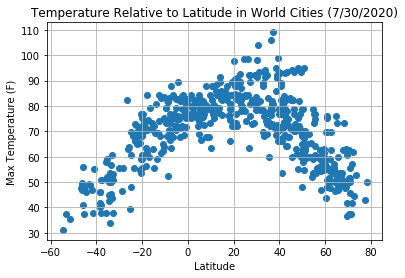

In [19]:
#Latitude vs Tempurature Plot
plt.scatter(city_weather["latitude"], city_weather["max temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Relative to Latitude in World Cities (7/30/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperaturevsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

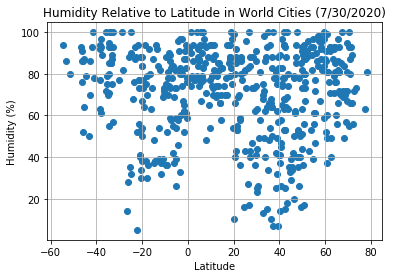

In [21]:
#Latitude vs Humidity Plot
plt.scatter(city_weather["latitude"], city_weather["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Relative to Latitude in World Cities (7/30/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

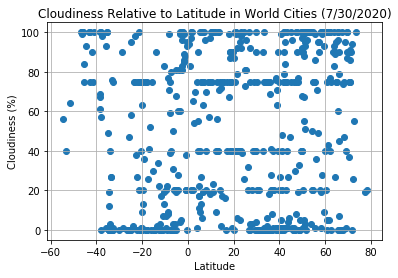

In [22]:
#Latitude vs Cloudiness Plot
plt.scatter(city_weather["latitude"], city_weather["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Relative to Latitude in World Cities (7/30/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

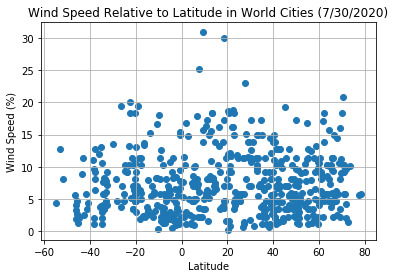

In [23]:
#Latitude vs Wind Speed Plot
plt.scatter(city_weather["latitude"], city_weather["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed Relative to Latitude in World Cities (7/30/2020)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindspeedvsLatitude.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression